# Dane
## Przykład - Wikipedia Pageview API
Dokumentacja/przykłady użycia Wikipedia Pageview API podane są [tutaj](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews).
Zasady korzystania z API wymagają podania jako `User-Agent` np. swojego adresu e-mail.

W następujący sposób można pobrać dzienną liczbę wyświetleń artykułu "Albert Einstein" w 2022 roku:

In [4]:
import requests
import pandas as pd

HEADERS = {"User-Agent": "s29758@pja.edu.pl"} # replace with your email if your run the example

def wiki_article_views_daily(article, start_date, end_date):
    url_base = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/user/"
    url = url_base + f"{article}/daily/{start_date}/{end_date}"
        
    r = requests.get(url, headers=HEADERS)
    
    return r

article = "Albert_Einstein"
start_date="2022010100"
end_date="2022123100"
r = wiki_article_views_daily(article, start_date, end_date)

print(r.status_code)
print(r.url)

200
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/user/Albert_Einstein/daily/2022010100/2022123100


In [5]:
df = pd.DataFrame(r.json()['items'])
df.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Albert_Einstein,daily,2022010100,all-access,user,12509
1,en.wikipedia,Albert_Einstein,daily,2022010200,all-access,user,14416
2,en.wikipedia,Albert_Einstein,daily,2022010300,all-access,user,14579
3,en.wikipedia,Albert_Einstein,daily,2022010400,all-access,user,14891
4,en.wikipedia,Albert_Einstein,daily,2022010500,all-access,user,14902


In [6]:
df['date'] = pd.to_datetime(df.timestamp, format='%Y%m%d00')
df = df[['date', 'article', 'views']].set_index('date')
df.head()

,article,views
date,,
2022-01-01,Albert_Einstein,12509
2022-01-02,Albert_Einstein,14416
2022-01-03,Albert_Einstein,14579
2022-01-04,Albert_Einstein,14891
2022-01-05,Albert_Einstein,14902


Text(0, 0.5, 'Views')

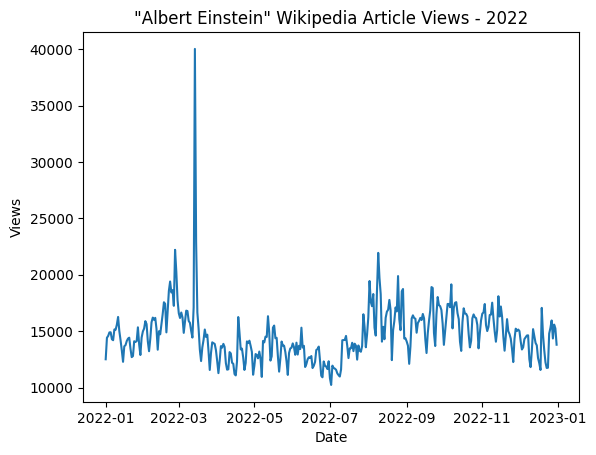

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df.views)
plt.title('"Albert Einstein" Wikipedia Article Views - 2022')
plt.xlabel('Date')
plt.ylabel('Views')

### Parametry URL
Możemy dodać parametry do URL podając `params` w metodzie `requests.get()`:

In [9]:
params = {'key1': 'val1', 'key2': 22}
r = requests.get("http://example.com/example", params=params)
print(r.url)

http://example.com/example?key1=val1&key2=22


## Zadania

1. Wybierz dowolny zbiór danych z [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Pobierz plik i wczytaj go do `DataFrame`.
    - Upewnij się, że wszystkie kolumny mają odpowiednie nazwy.
    - Tam, gdzie potrzeba, ustaw odpowiedni typ danych. Przydatne metody: [`pd.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), [`astype()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).
    - Jeśli jedna z kolumn jest naturalnym indeksem, ustaw ją jako indeks.
2. Strona https://open-meteo.com udostępnia API pozwalające pobierać historyczne dane pogodowe. Znajdź na stronie dokumentację API, a następnie:
    - Stwórz procedurę, która otrzyma współrzędne geograficzne (latitude, longitude) i zakres dat, a następnie pobierze dane pogodowe z API.
    - Umieść pobrane dane w `DataFrame`. Upewnij się, że wszystkie kolumny mają odpowiednie nazwy i typ danych. Ustaw daty jako indeks.
    - Opcjonalnie: wykorzystaj Geocoding API (np. https://nominatim.org/ udostępniany przez OpenStreetMap), aby automatycznie pobrać współrzędne geograficzne dla podanej lokalizacji. 
3. Wikipedia Pageview API pozwala pobrać listę najczęściej wyświetlanych artykułów. Sprawdź w dokumentacji jak to zrobić, a następnie:
    - Znajdź 10 najczęściej wyświetlanych artykułów z `en.wikipedia.org` w styczniu 2022. Uwaga: na liście znajdą się też strony specjalne, np. `Main_Page`. Należy je manualnie odfiltrować.
    - Następnie dla każdego z nich pobierz liczbę wyświetleń dla każdego dnia w 2022. Umieść wszystkie dane w `DataFrame`.
4. Zbiór danych w pliku `censusData-with3errors` zawiera trzy dodane celowo błędy. Znajdź je.

## Zadanie 1

In [ ]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', 
    sep="\t", 
    names = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction/side','Scaled/sound']
)

In [13]:
df.head(10)

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction/side,Scaled/sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle of attack       1503 non-null   float64
 2   Chord length          1503 non-null   float64
 3   Free-stream velocity  1503 non-null   float64
 4   Suction/side          1503 non-null   float64
 5   Scaled/sound          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


## Zadanie 2

In [ ]:
from datetime import datetime
def get_historical_date(lat: float, lon: float, start_date: datetime, end_date: datetime) -> pd.DataFrame:
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")
    
    url = f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,weather_code,pressure_msl,surface_pressure,visibility&start_date={start_date}&end_date={end_date}'
    
    r = requests.get(url, headers=HEADERS)
    
    df = pd.DataFrame(r.json()["hourly"])
    
    df['time'] = pd.to_datetime(df['time']).dt.date

    return df

In [ ]:
get_historical_date(52, 52, datetime(2024, 12, 12), datetime(2024, 12, 14))

,time,temperature_2m,weather_code,pressure_msl,surface_pressure,visibility
0,2024-12-12,None,None,None,None,None
1,2024-12-12,None,None,None,None,None
2,2024-12-12,None,None,None,None,None
3,2024-12-12,None,None,None,None,None
4,2024-12-12,None,None,None,None,None
...,...,...,...,...,...,...
67,2024-12-14,None,None,None,None,None
68,2024-12-14,None,None,None,None,None
69,2024-12-14,None,None,None,None,None
70,2024-12-14,None,None,None,None,None


In [123]:

from typing import Tuple


def get_coordinates(city: str, country: str) -> Tuple[str, str]:
    url = f"https://nominatim.openstreetmap.org/search?city={city}&country={country}&format=json"
    r = requests.get(url)
    return (r.json()["lat"], r.json()["lon"])

In [124]:
get_coordinates("Warsaw", "Poland")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)